In [1]:
# Installing an extra package
!pip install tensorflow

In [2]:
# Importing all important libraries
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import seaborn as sns           # for working with maps
import torch                    # Pytorch module
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary              # for getting the summary of our model
import tensorflow as ts
from  tensorflow import keras
import itertools
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve

%matplotlib inline

In [3]:
pip install tensorflow opencv-python matplotlib scikit-learn


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [5]:
!pip install kaggle

In [6]:
import json

kaggle_credentails = json.load(open("kaggle.json"))

In [7]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [8]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors


In [9]:
!ls

kaggle.json  new-plant-diseases-dataset.zip  sample_data


In [10]:
# Import the ZipFile class from the zipfile module
from zipfile import ZipFile

# Unzip the downloaded dataset
with ZipFile("new-plant-diseases-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [11]:
# Dataset
dataset="/content/New Plant Diseases Dataset(Augmented)"
# Training Data
train_data="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
# Validation Data
valid_data="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
# Testing Data
test_data="/content/test/test"

In [12]:
# Retrieve the list of diseases from the train_data and print it
diseases=os.listdir(train_data)
print(diseases)

['Blueberry___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Septoria_leaf_spot', 'Peach___healthy', 'Grape___Esca_(Black_Measles)', 'Corn_(maize)___Northern_Leaf_Blight', 'Potato___Late_blight', 'Cherry_(including_sour)___healthy', 'Apple___Black_rot', 'Raspberry___healthy', 'Corn_(maize)___healthy', 'Potato___healthy', 'Tomato___Early_blight', 'Grape___healthy', 'Soybean___healthy', 'Tomato___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Grape___Black_rot', 'Tomato___Target_Spot', 'Orange___Haunglongbing_(Citrus_greening)', 'Apple___Cedar_apple_rust', 'Strawberry___healthy', 'Apple___healthy', 'Tomato___Tomato_mosaic_virus', 'Pepper,_bell___Bacterial_spot', 'Corn_(maize)___Common_rust_', 'Strawberry___Leaf_scorch', 'Tomato___Leaf_Mold', 'Apple___Apple_scab', 'Peach___Bacterial_spot', 'Tomato___Late_blight', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Squash___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Potato___Early_blight'

In [13]:
# Print the number of classes or diseases present in the train_data
print("Number of classes : ",len(diseases))

Number of classes :  38


In [14]:
# Count the number of images per class in the training data directory and display the counts in a DataFrame
nums_train={}
nums_valid={}
for disease in diseases:
    nums_train[disease]=len(os.listdir(train_data+'/'+disease))
    nums_valid[disease]=len(os.listdir(valid_data+'/'+disease))
image_class_count_train=pd.DataFrame(nums_train.values(),index=nums_train.keys(),columns=['No. of images'])
print('Training data images count per class : ',)
print(image_class_count_train)

Training data images count per class : 
                                                    No. of images
Blueberry___healthy                                          1816
Tomato___Tomato_Yellow_Leaf_Curl_Virus                       1961
Tomato___Septoria_leaf_spot                                  1745
Peach___healthy                                              1728
Grape___Esca_(Black_Measles)                                 1920
Corn_(maize)___Northern_Leaf_Blight                          1908
Potato___Late_blight                                         1939
Cherry_(including_sour)___healthy                            1826
Apple___Black_rot                                            1987
Raspberry___healthy                                          1781
Corn_(maize)___healthy                                       1859
Potato___healthy                                             1824
Tomato___Early_blight                                        1920
Grape___healthy                     

In [15]:
# Count the number of images per class in the validation data directory and display the counts in a DataFrame
image_class_count_valid=pd.DataFrame(nums_valid.values(),index=nums_valid.keys(),columns=['No. of images'])
print('Validation data images count per class : ',)
print(image_class_count_valid)

Validation data images count per class : 
                                                    No. of images
Blueberry___healthy                                           454
Tomato___Tomato_Yellow_Leaf_Curl_Virus                        490
Tomato___Septoria_leaf_spot                                   436
Peach___healthy                                               432
Grape___Esca_(Black_Measles)                                  480
Corn_(maize)___Northern_Leaf_Blight                           477
Potato___Late_blight                                          485
Cherry_(including_sour)___healthy                             456
Apple___Black_rot                                             497
Raspberry___healthy                                           445
Corn_(maize)___healthy                                        465
Potato___healthy                                              456
Tomato___Early_blight                                         480
Grape___healthy                   

<Axes: title={'center': 'Training data images count per class'}, xlabel='Number of images', ylabel='Classes'>

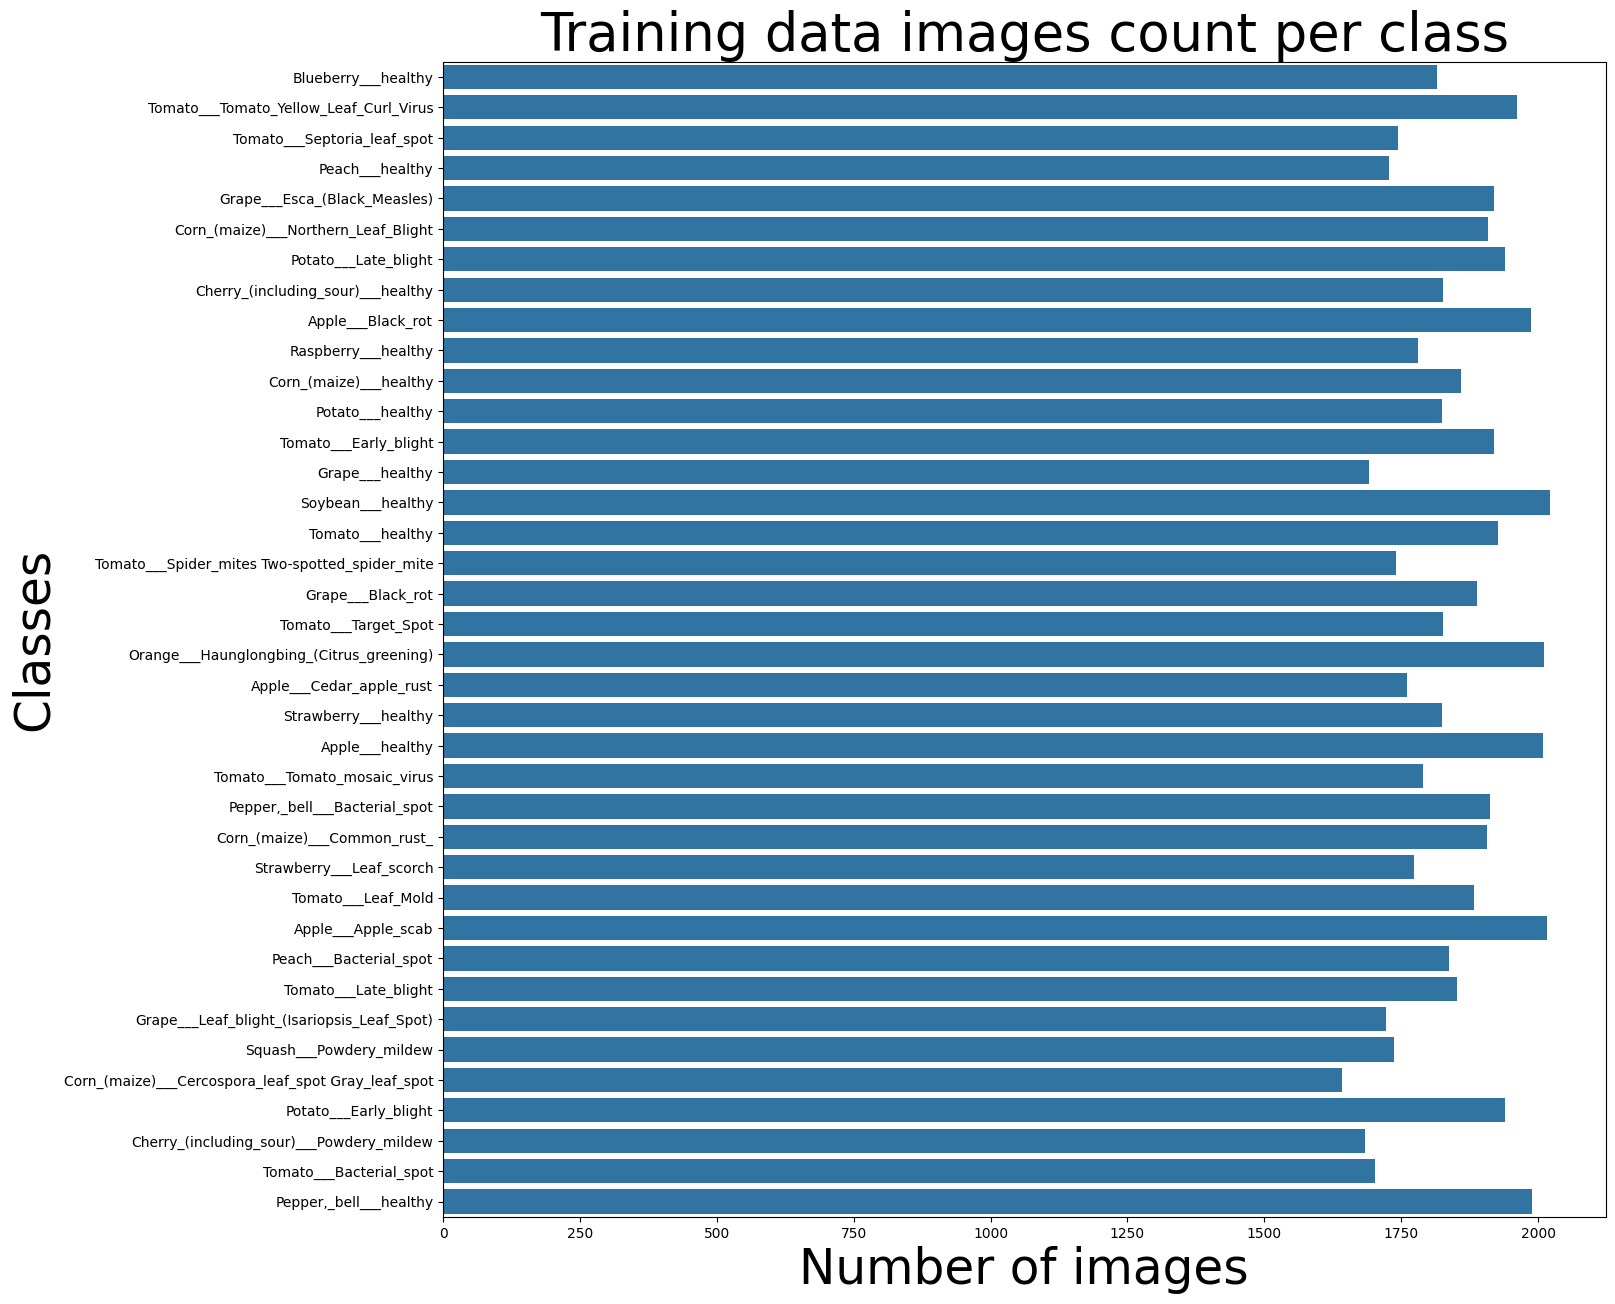

In [16]:
# Create a bar plot showing the count of training images per class
plt.figure(figsize=(15,15))
plt.title("Training data images count per class",fontsize=38)
plt.xlabel('Number of images', fontsize=35)
plt.ylabel('Classes', fontsize=35)

keys=list(nums_train.keys())
vals=list(nums_train.values())
sns.barplot(y=keys,x=vals)

<Axes: title={'center': 'Validation data images count per class'}, xlabel='Number of images', ylabel='Classes'>

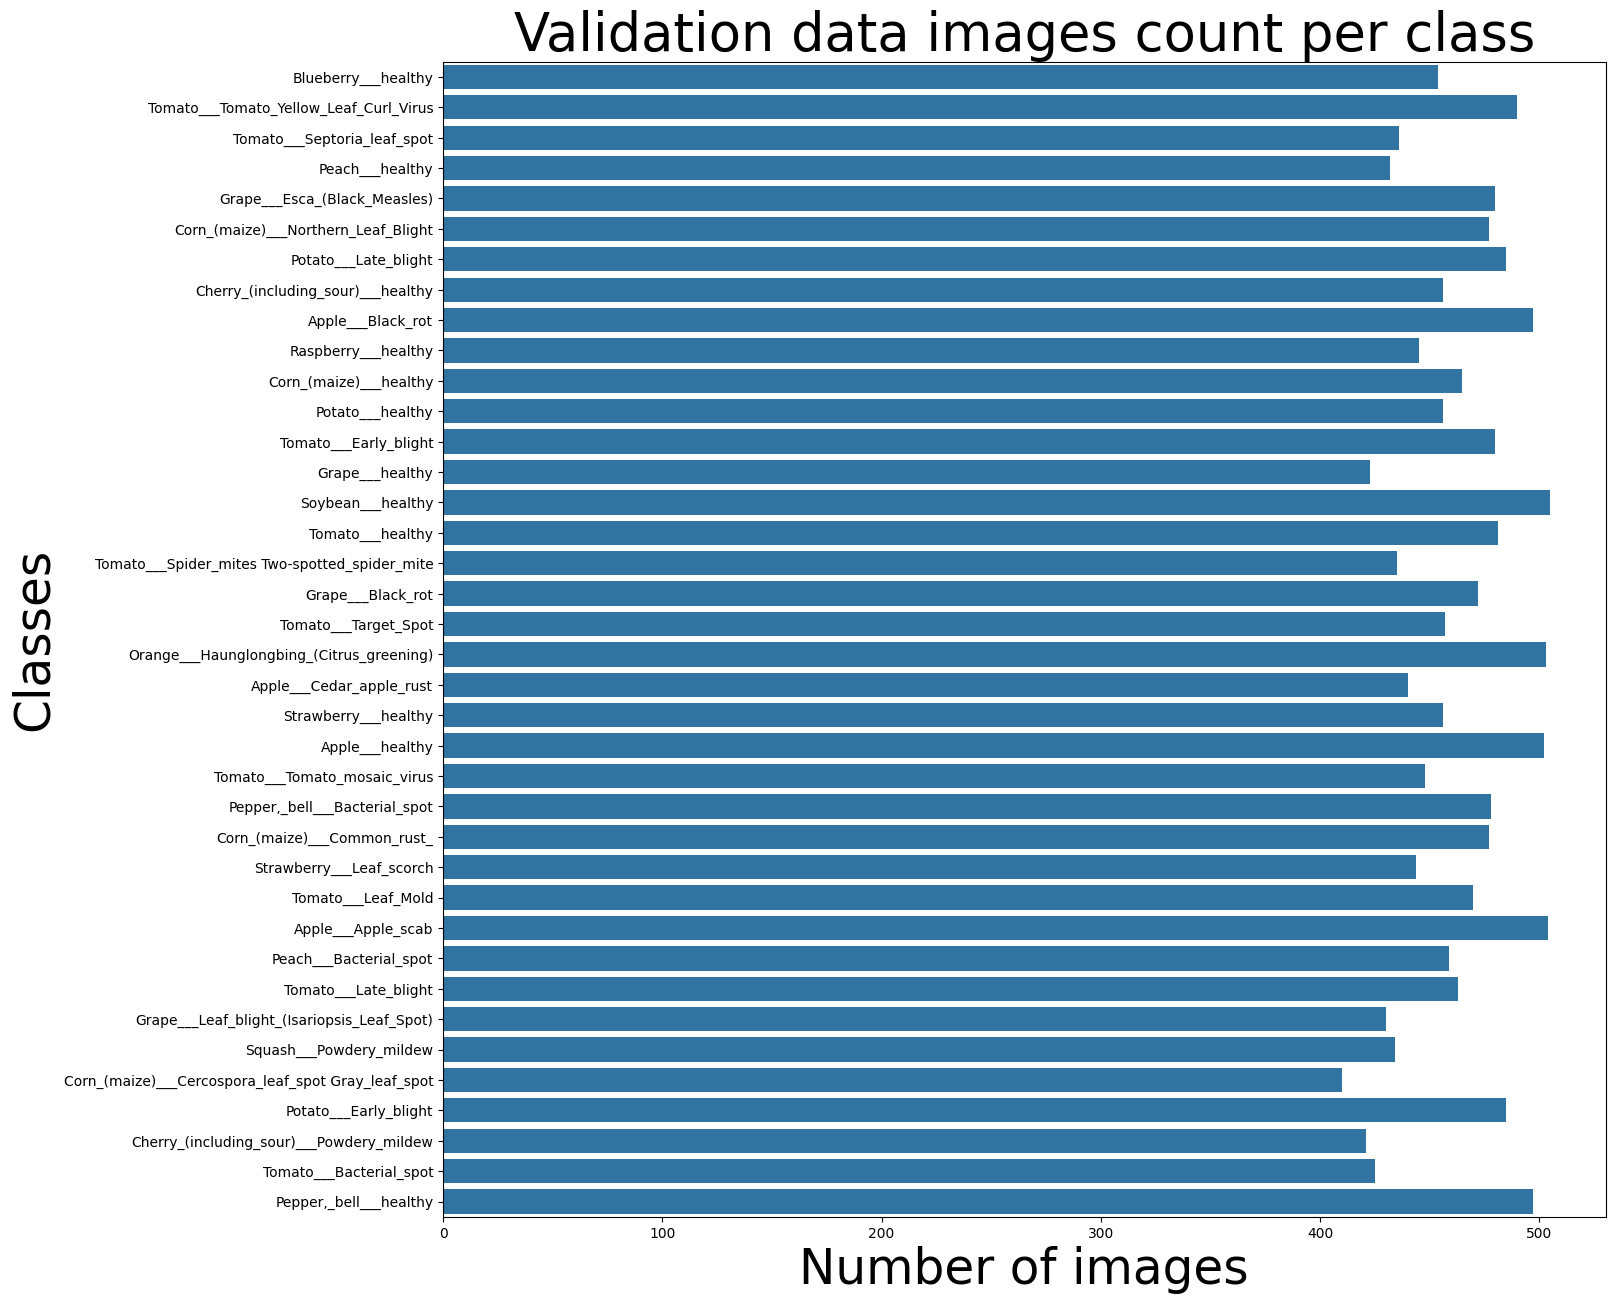

In [17]:
# Create a bar plot showing the count of validation images per class
plt.figure(figsize=(15,15))
plt.title("Validation data images count per class",fontsize=38)
plt.xlabel('Number of images', fontsize=35)
plt.ylabel('Classes', fontsize=35)

keys=list(nums_valid.keys())
vals=list(nums_valid.values())
sns.barplot(y=keys,x=vals)

In [18]:
#  Calculate the total number of images for validation
total_valid=0
for value in nums_valid.values():
    total_valid+=value
print("Total number of images for validation : ", total_valid)

Total number of images for validation :  17572


In [19]:
# Extract unique plant names and unique disease names from the list of diseases.
plants_unique=[]
diseases_unique=[]
for i in diseases:
    if(i.split('__'))[0] not in plants_unique:
        plants_unique.append(i.split('__')[0])
    if(i.split('___'))[1] != 'healthy':
        diseases_unique.append(i.split('___')[1])

In [20]:
# Print the unique plant names extracted from the list of diseases and display the total number of unique plant names
print('Plants : ', plants_unique)
print('-'*100)
print('Number of plants : ', len(plants_unique))

Plants :  ['Blueberry', 'Tomato', 'Peach', 'Grape', 'Corn_(maize)', 'Potato', 'Cherry_(including_sour)', 'Apple', 'Raspberry', 'Soybean', 'Orange', 'Strawberry', 'Pepper,_bell', 'Squash']
----------------------------------------------------------------------------------------------------
Number of plants :  14


In [21]:
# Print the unique plant diseases extracted from the list of diseases and display the total number of unique plant diseases
print('Diseases : ', diseases_unique)
print('-'*100)
print('Number of diseases : ', len(diseases_unique))

Diseases :  ['Tomato_Yellow_Leaf_Curl_Virus', 'Septoria_leaf_spot', 'Esca_(Black_Measles)', 'Northern_Leaf_Blight', 'Late_blight', 'Black_rot', 'Early_blight', 'Spider_mites Two-spotted_spider_mite', 'Black_rot', 'Target_Spot', 'Haunglongbing_(Citrus_greening)', 'Cedar_apple_rust', 'Tomato_mosaic_virus', 'Bacterial_spot', 'Common_rust_', 'Leaf_scorch', 'Leaf_Mold', 'Apple_scab', 'Bacterial_spot', 'Late_blight', 'Leaf_blight_(Isariopsis_Leaf_Spot)', 'Powdery_mildew', 'Cercospora_leaf_spot Gray_leaf_spot', 'Early_blight', 'Powdery_mildew', 'Bacterial_spot']
----------------------------------------------------------------------------------------------------
Number of diseases :  26


In [22]:
# Create a rescaling layer in a Keras model
rescale=keras.layers.Rescaling(scale=1.0/255)

In [23]:
# Create TensorFlow tf.data.Dataset objects from image directories for training and validation data in Keras
# Images are loaded with the specified image size of (256, 256), and the function image_dataset_from_directory assigns labels based on subdirectory names
training_data =keras.utils.image_dataset_from_directory(train_data , image_size=(256, 256))
validation_data = keras.utils.image_dataset_from_directory(valid_data, image_size=(256, 256))

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [24]:
# Create generator objects for training and validation data by applying the rescaling layer to the images
train_gen = training_data.map(lambda image,label:(rescale(image),label))
valid_gen  = validation_data.map(lambda image,label:(rescale(image),label))

In [25]:
# Create a convolutional neural network (CNN) model using the Sequential API in Keras

# Creates a sequential model, which is a linear stack of layers
model = Sequential()

# Add a series of convolutional and max pooling layers to the model
# The Conv2D layers perform convolutional operations on the input data, and the MaxPooling2D layers perform downsampling by taking the maximum value within each window
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output from the previous layer
# Adds a flatten layer that converts the multi-dimensional output of the previous layer into a one-dimensional vector
model.add(Flatten())

# Add fully connected layers to the model.
# The Dense layers are densely connected neural layers, and the Dropout layer applies dropout regularization to prevent overfitting
# The last Dense layer has a softmax activation function, which is suitable for multi-class classification problems
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(38, activation='softmax'))

# Compiles the model, configuring the optimizer, loss function, and evaluation metrics for training
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model, displaying the layer configuration and the number of parameters in each layer
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    29,491,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,594,470 (112.89 MB)

 Trainable params: 29,594,470 (112.89 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,525,798 (24.89 MB)

 Trainable params: 6,525,798 (24.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 110s 47ms/step - accuracy: 0.4362 - loss: 2.0037 - val_accuracy: 0.8484 - val_loss: 0.4866
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 114s 37ms/step - accuracy: 0.8126 - loss: 0.6011 - val_accuracy: 0.9114 - val_loss: 0.2773
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 75s 34ms/step - accuracy: 0.8746 - loss: 0.3941 - val_accuracy: 0.9037 - val_loss: 0.3087
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9052 - loss: 0.2999 - val_accuracy: 0.9368 - val_loss: 0.2003
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.9239 - loss: 0.2335 - val_accuracy: 0.9276 - val_loss: 0.2307
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 134s 34ms/step - accuracy: 0.9361 - loss: 0.2003 - val_accuracy: 0.9434 - val_loss: 0.1792
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.9438 - loss: 0.1706 - val_accuracy: 0.9380 - val_loss: 0.2078
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 140s 37ms/step - accuracy: 0.94

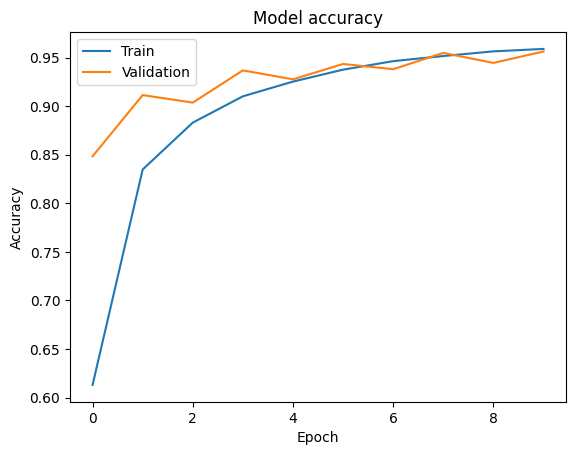

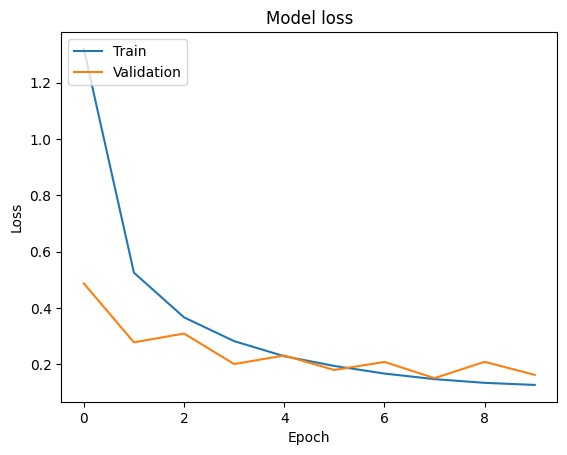

In [26]:
# prompt: there are too much images in the train data and validation data it is possible to reduce the image and then run train keras model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
# ... (your existing code)

# Function to reduce image size
def reduce_image_size(image, label, target_size=(128,128)):
  image = tf.image.resize(image, target_size)
  return image, label


# Reduce image size in training and validation datasets
train_gen = train_gen.map(reduce_image_size)
valid_gen = valid_gen.map(reduce_image_size)

# Recreate the model with input shape matching the reduced size
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128,128, 3))) # Changed input shape
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(38, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Train the model
# You might need to adjust epochs and batch_size
history = model.fit(train_gen, epochs=10, validation_data=valid_gen, batch_size=32)


#Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss per epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [27]:
# Obtain the labels and predictions for the validation data.
labels = []
predictions = []
for x,y in valid_gen:
    labels.append(list(y.numpy()))
    predictions.append(ts.argmax(model.predict(x),1).numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━

In [ ]:
# Flatten the nested lists of predictions and labels
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [29]:
# Print various evaluation metrics based on the model's performance
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 95.89 %
Test Accuracy   : 95.63 %
Precision Score : 95.63 %
Recall Score    : 95.63 %


<Figure size 2000x500 with 0 Axes>

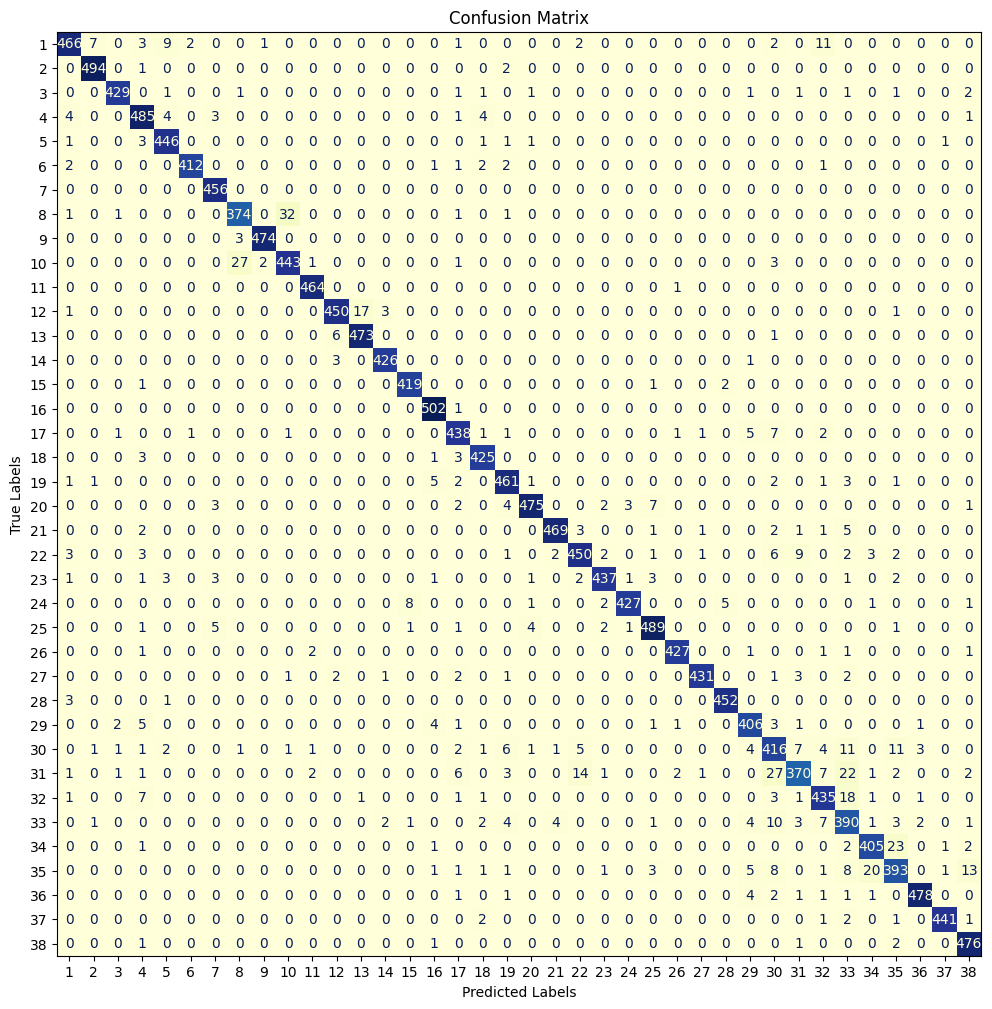

In [30]:
# Plot a confusion matrix based on the true labels and predicted labels
plt.figure(figsize= (20,5))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

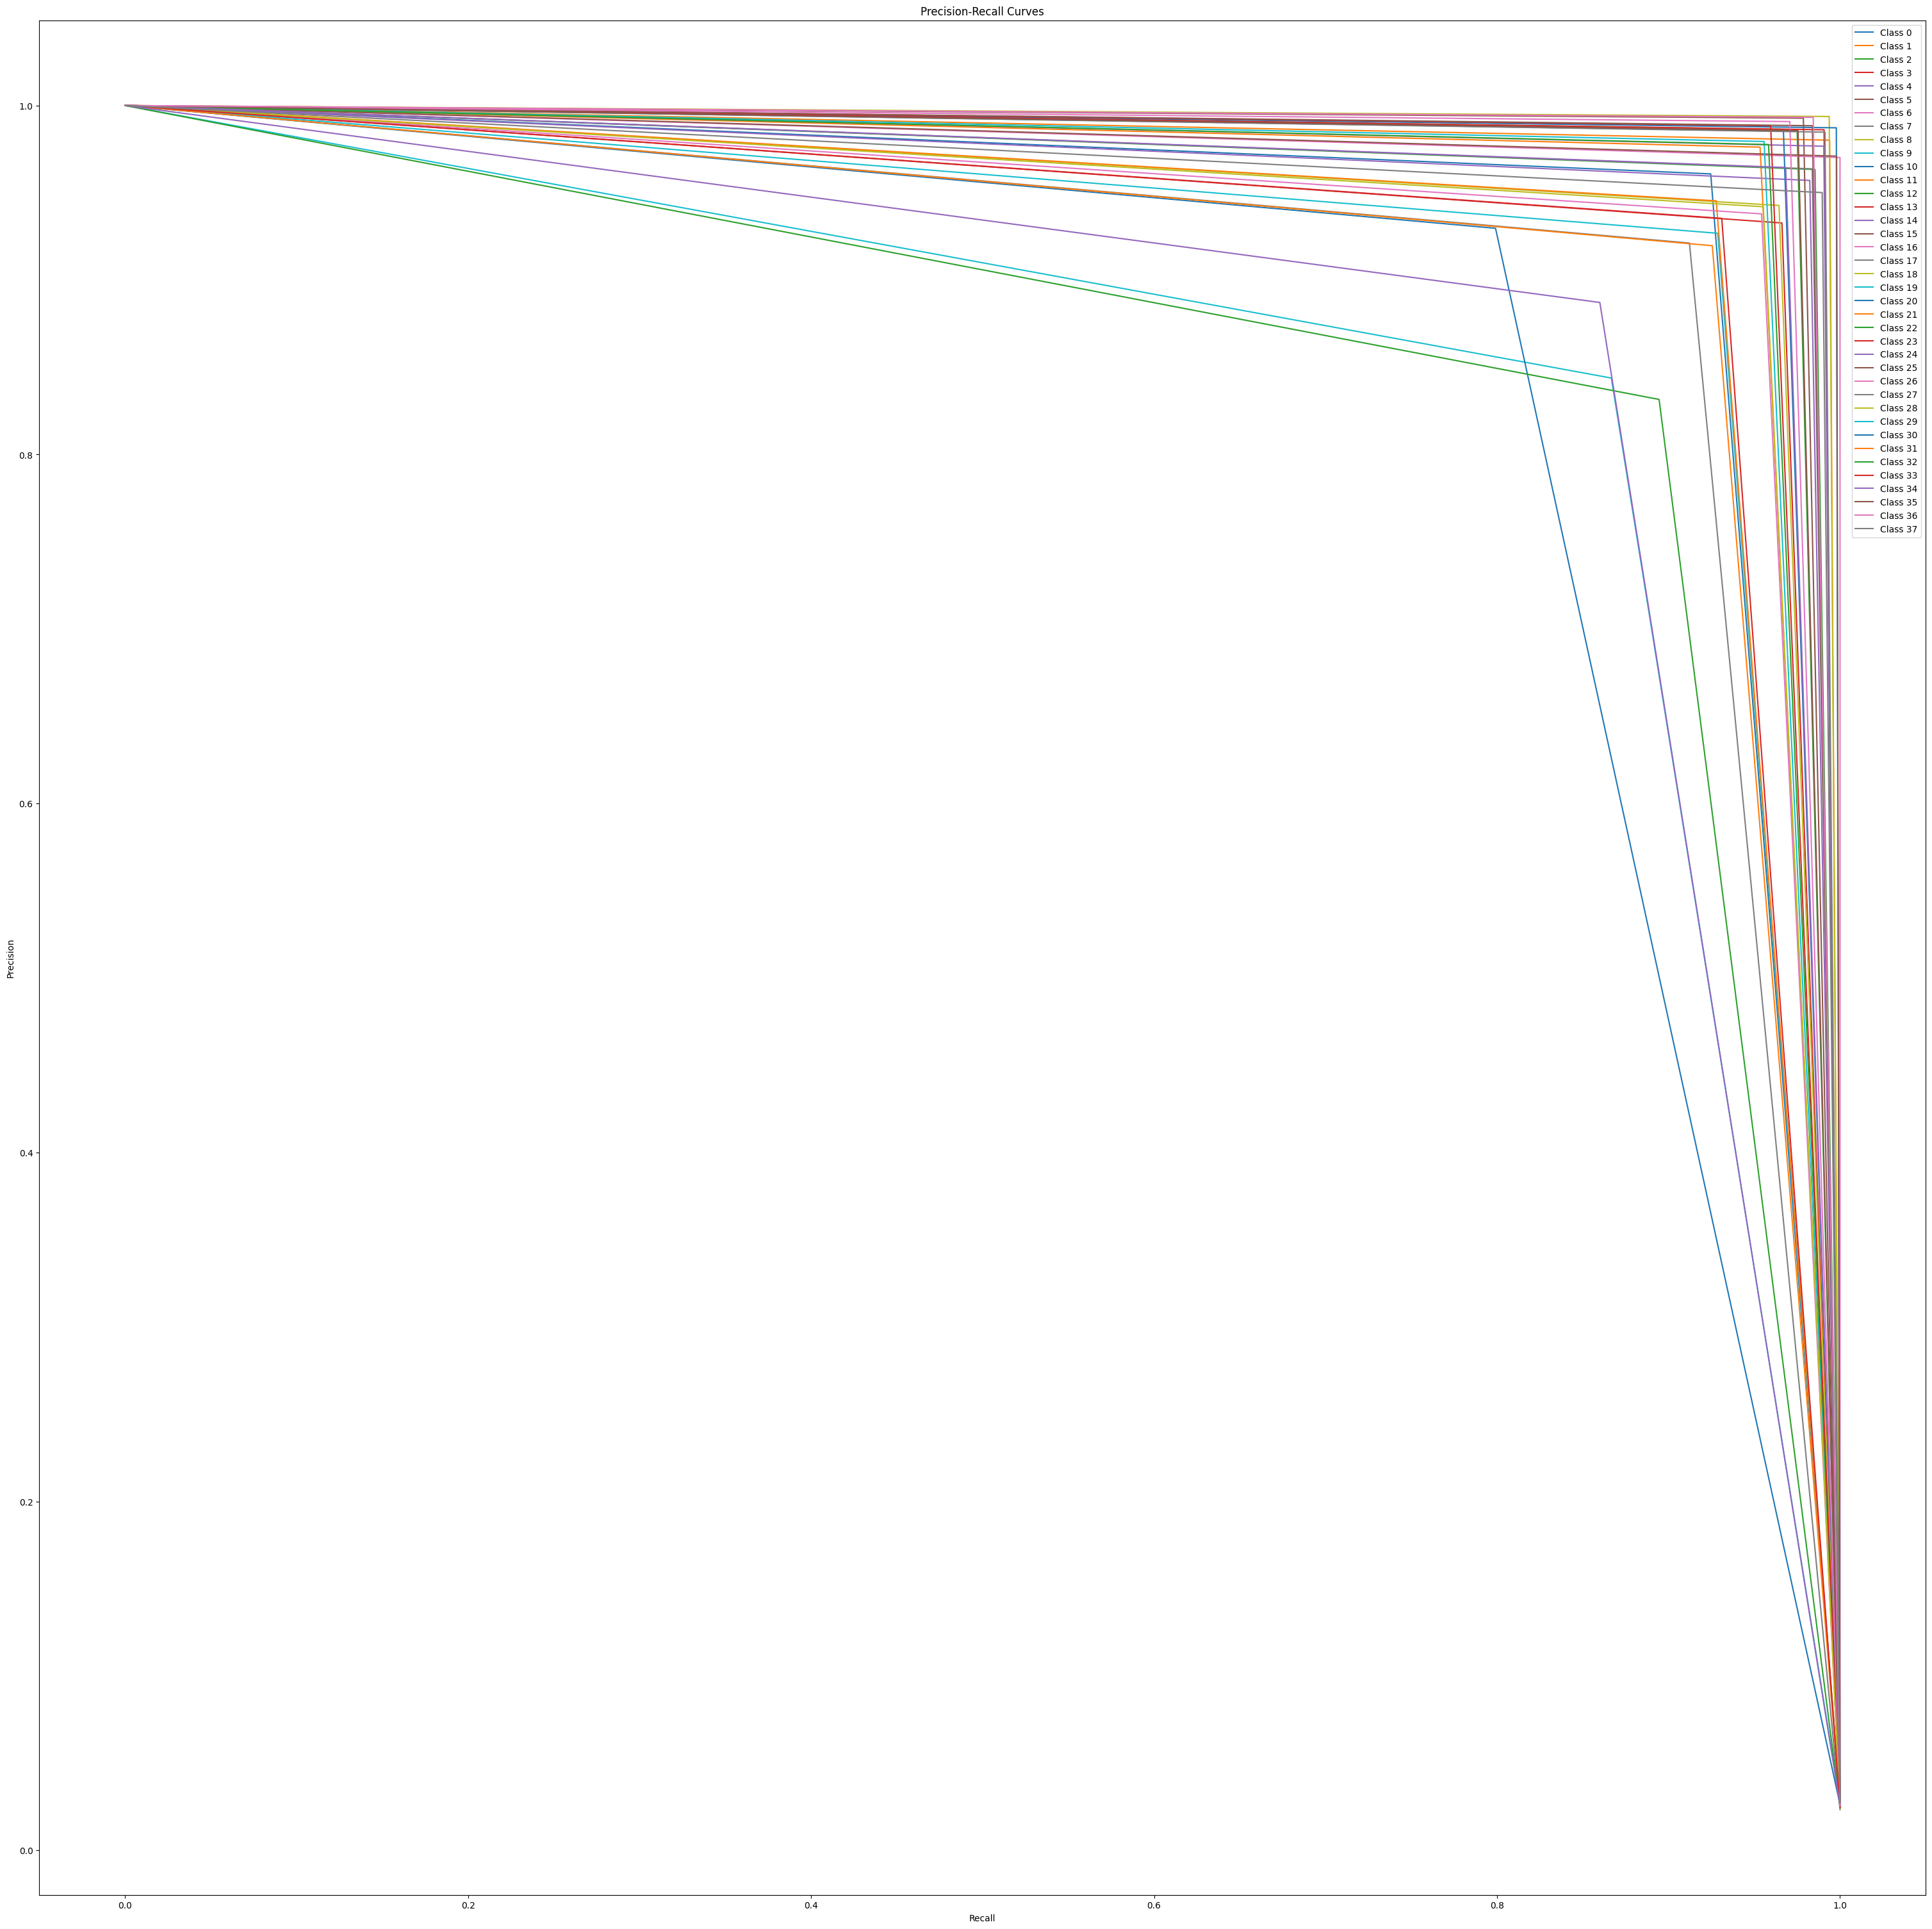

In [31]:
# Precision-recall curve

labels_array = np.array(labels)
predictions_array = np.array(predictions)

# Perform one-hot encoding on the labels and predictions
num_classes = 38  # Replace with the actual number of classes
labels_one_hot = label_binarize(labels_array, classes=range(num_classes))
predictions_one_hot = label_binarize(predictions_array, classes=range(num_classes))

precision = dict()
recall = dict()
plt.figure(figsize= (38,38))
for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(labels_one_hot[:, i], predictions_one_hot[:, i])
    plt.plot(recall[i], precision[i], label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step


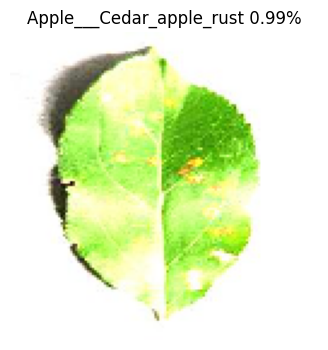

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


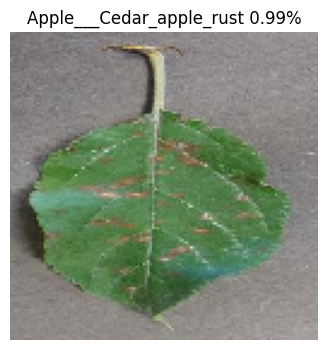

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


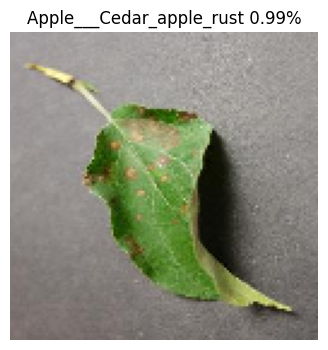

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


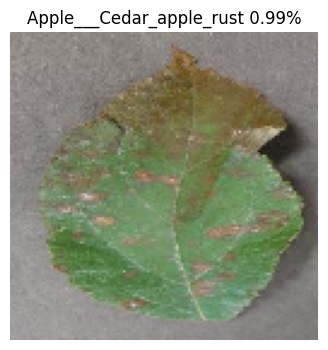

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


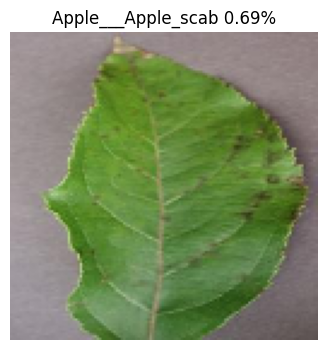

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


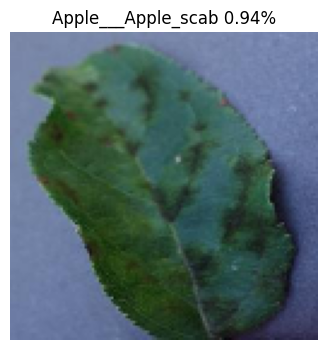

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


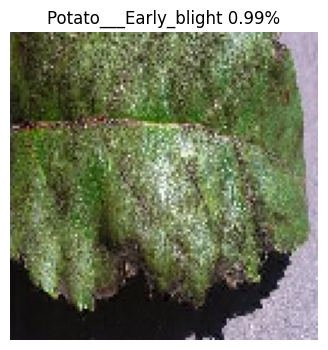

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


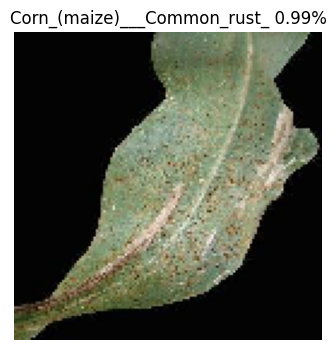

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


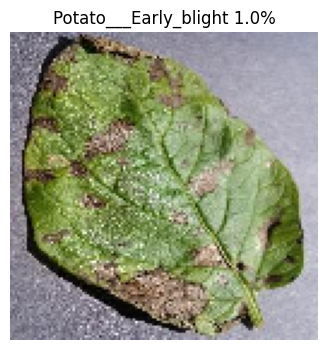

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


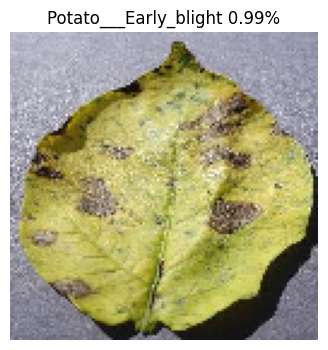

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


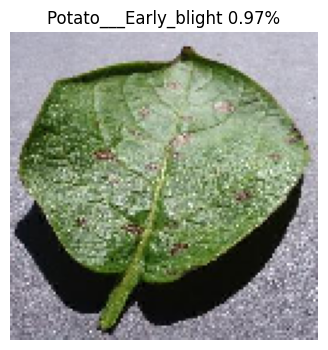

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


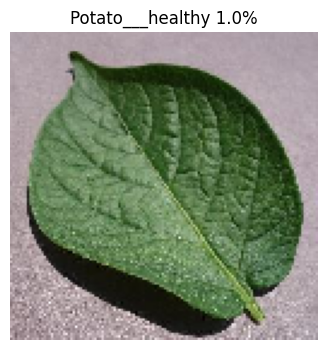

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


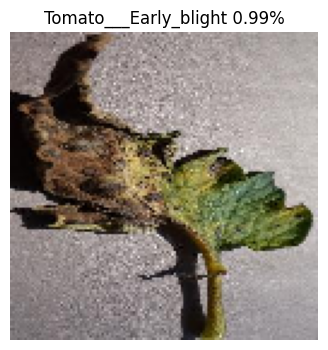

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


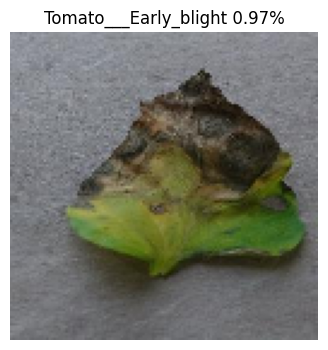

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


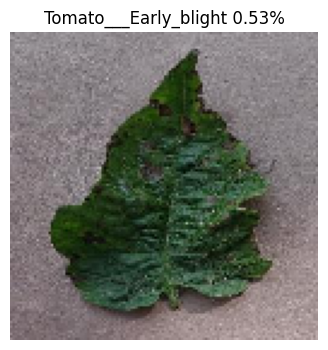

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


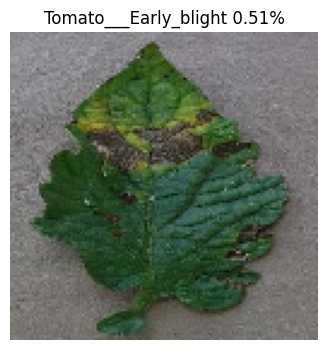

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


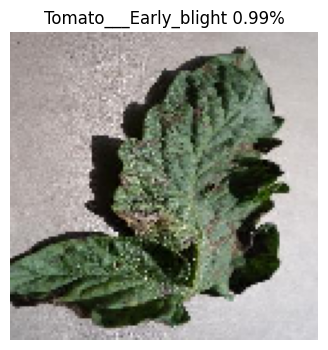

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


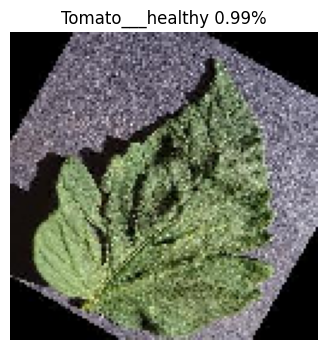

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


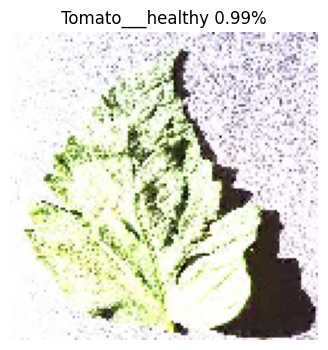

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


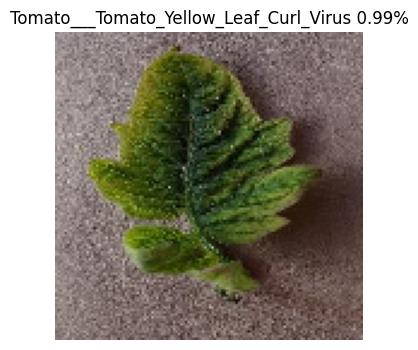

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


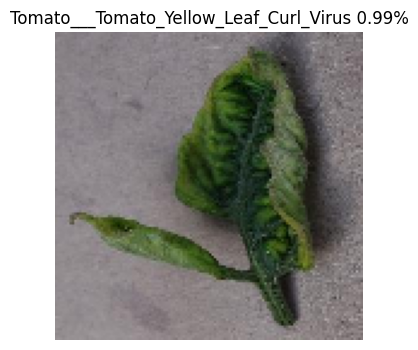

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


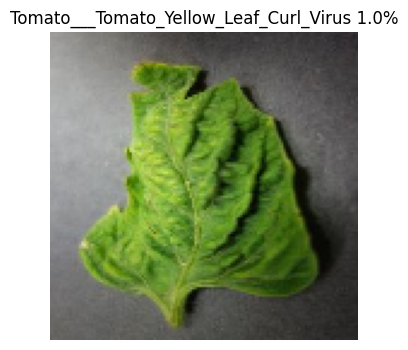

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


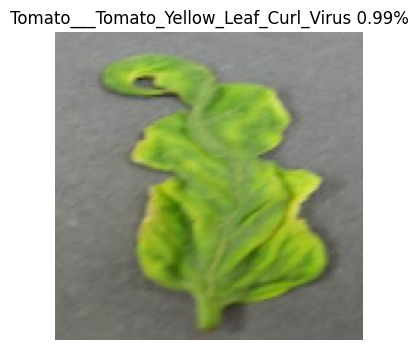

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


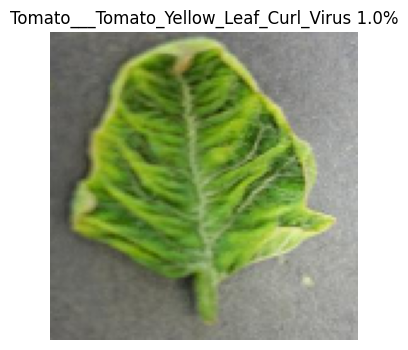

In [32]:
Li = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
      'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy',
      'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
      'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy',
      'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight',
      'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch',
      'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight',
      'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',
      'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
# predicting an image
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np
directory="/content/test/test"
files = [os.path.join(directory,p) for p in sorted(os.listdir(directory))]
for i in range(0,33):
    image_path = files[i]
    new_img =keras.utils.load_img(image_path, target_size=(128,128))
    img = keras.utils.img_to_array(new_img)
    img = np.expand_dims(img, axis=0)
    img = img/255
    prediction = model.predict(img)
    probabilty = prediction.flatten()
    max_prob = probabilty.max()
    index=prediction.argmax(axis=-1)[0]
    class_name = Li[index]
    #ploting image with predicted class name
    plt.figure(figsize = (4,4))
    plt.imshow(new_img)
    plt.axis('off')
    plt.title(class_name+" "+ str(max_prob)[0:4]+"%")
    plt.show()

Enter the full path of the image: /content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Black_rot/0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727_90deg.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


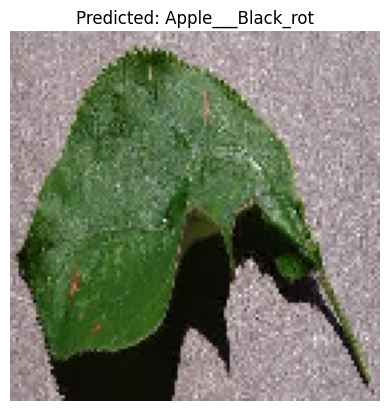

'Apple___Black_rot'

In [33]:
def predict_image(img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(128,128))  # same size as during training
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize (same as training)

    # Predict
    predictions = model.predict(img_array)
    class_names = Li
    predicted_class = class_names[np.argmax(predictions)]

    # Plot the image with prediction
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

    return predicted_class
img_path = input("Enter the full path of the image: ")
predict_image(img_path)